# Question Generation: Visualization of the four experiments results. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
from pylab import rcParams
import matplotlib.pyplot as plt
import pathlib
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
# HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
HAPPY_COLORS_PALETTE = ["mediumaquamarine", "darkviolet", "tomato", "gold"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 8, 5
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
ROOT_DIR = pathlib.Path().resolve().parents[1]
print(f"Root directory: {ROOT_DIR}")
DATA_DIR_AA = ROOT_DIR/'qg'/'transformers_models'/'experiment_AA'
DATA_DIR_AQPL = ROOT_DIR/'qg'/'transformers_models'/'experiment_AQPL'
DATA_DIR_BASIC = ROOT_DIR/'qg'/'transformers_models'/'experiment_basic'
DATA_DIR_OQPL = ROOT_DIR/'qg'/'transformers_models'/'experiment_OQPL'

Root directory: C:\Users\DeboraOrsolich\Development\question_generation_models\deep_qg


TRAINING RESULTS OF THE THREE DIFFERENT PREPROCESSING SETTINGS

- Training process:
    - Training loss
    - Training accuracy
- Metrics:
    - Similarity
    - F1
    - BLEU-1, BLEU-2, BLEU-3, BLEU-4
    - Leaning application of questions (classification score)
    - Graphs need improvement...

### Training loss and Training time

In [3]:
with open(DATA_DIR_AA/"results_t5_small_2022-05-19_1652977219.5982807.json", encoding="utf-8") as f:
    training_AA = json.load(f)
with open(DATA_DIR_AQPL/"results_t5_small_2022-05-17_1652808598.3658466.json", encoding="utf-8") as f:
    training_AQPL = json.load(f)
with open(DATA_DIR_BASIC/"results_t5_small_2022-05-20_1653056871.055142.json", encoding="utf-8") as f:
    training_basic = json.load(f)
with open(DATA_DIR_OQPL/"results_t5_small_2022-05-17_1652821612.2016535.json", encoding="utf-8") as f:
    training_OQLP = json.load(f)

In [4]:
# rcParams['figure.figsize'] = 8, 5
# epoch = [i for i in range(1, len(training_AA["epoch_loss"])+1)]
# # sns.lineplot(x=epoch, y=train_epoch_loss)
# plt.plot(epoch, training_AA["epoch_loss"], label="AA", color="darkviolet")
# plt.plot(epoch, training_AQPL["epoch_loss"], label="AQPL", color="tomato")
# plt.plot(epoch, training_basic["epoch_loss"], label="Base", color="mediumaquamarine")
# plt.plot(epoch, training_OQLP["epoch_loss"], label="OQPL", color="gold")
# plt.suptitle("Comparative of the \n training performance")
# plt.xlabel('Number of epoch')
# plt.ylabel('Average Cross Entropy Loss')
# plt.ylim([0, 3])
# plt.legend()

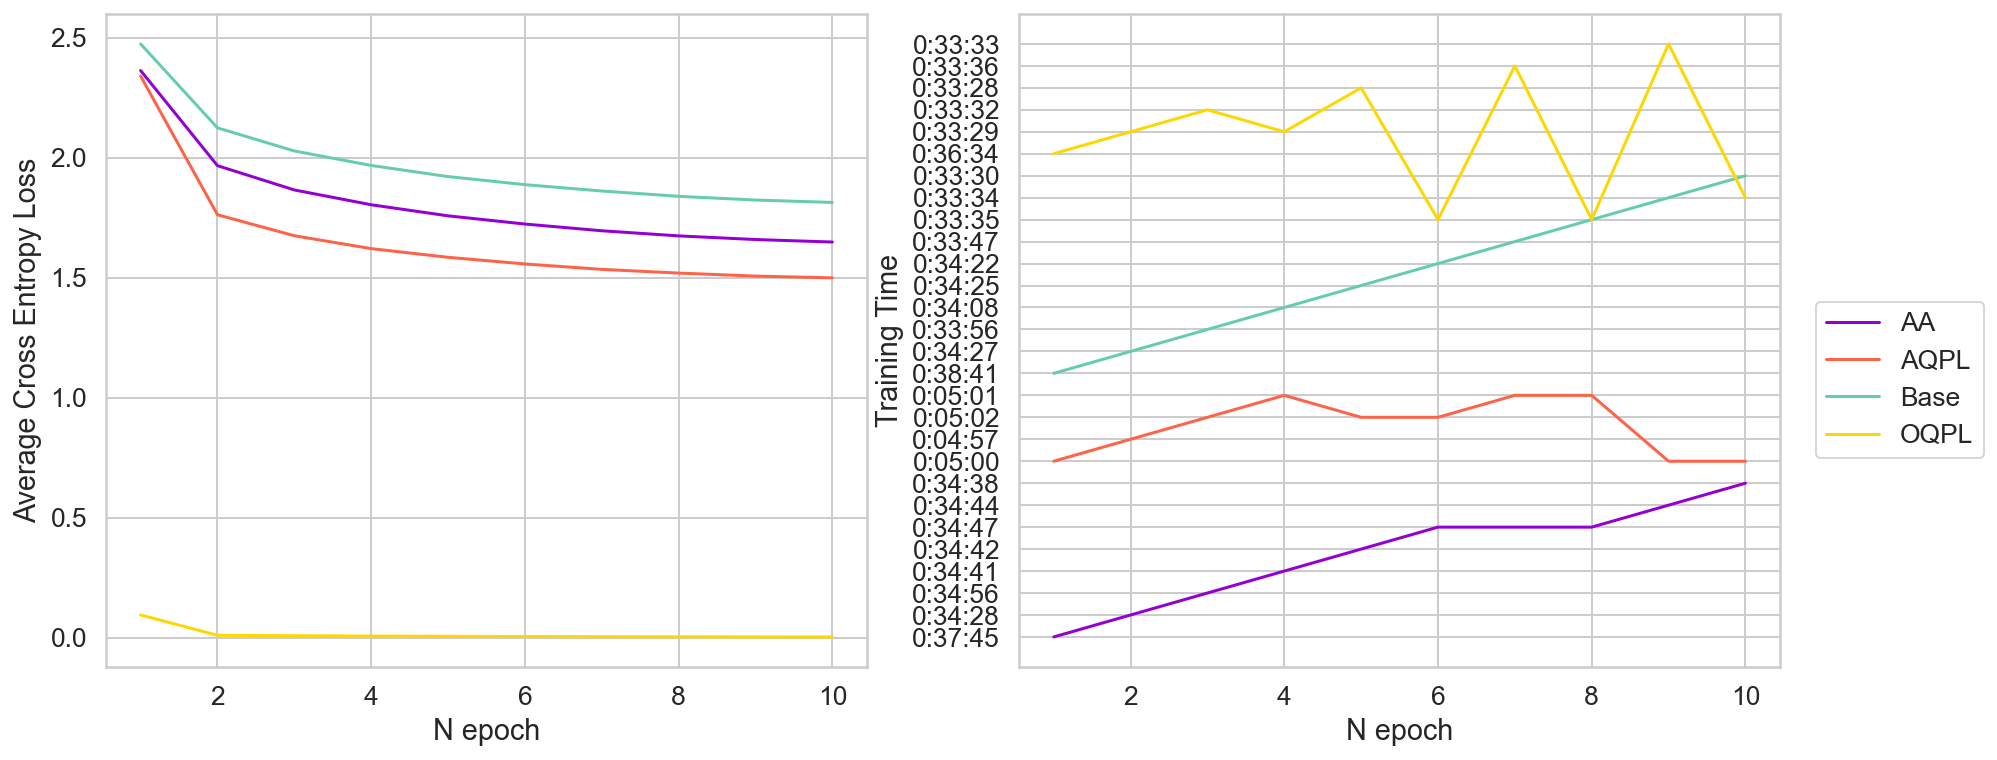

In [5]:
rcParams["legend.loc"] 

epoch = [i for i in range(1, len(training_AA["epoch_loss"])+1)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6), sharex=False, sharey=False)


ax1.plot(epoch, training_AA["epoch_loss"], label="AA", color="darkviolet")
ax1.plot(epoch, training_AQPL["epoch_loss"], label="AQPL", color="tomato")
ax1.plot(epoch, training_basic["epoch_loss"], label="Base", color="mediumaquamarine")
ax1.plot(epoch, training_OQLP["epoch_loss"], label="OQPL", color="gold")


ax2.plot(epoch, training_AA["training_epoch_time"], label="AA", color="darkviolet")
ax2.plot(epoch, training_AQPL["training_epoch_time"], label="AQPL", color="tomato")
ax2.plot(epoch, training_basic["training_epoch_time"], label="Base", color="mediumaquamarine")
ax2.plot(epoch, training_OQLP["training_epoch_time"], label="OQPL", color="gold")

ax1.set_ylabel('Average Cross Entropy Loss')
ax2.set_ylabel('Training Time')
ax1.set_xlabel("N epoch")
ax2.set_xlabel("N epoch")
plt.figlegend(['AA', 'AQPL', 'Base', 'OQPL'], loc="center right")

# plt.legend()

In [6]:
print("Total training time of each preprocessing setting:")
print(f'   AA:   {training_AA["total_training_time"]}')
print(f'   AQPL: {training_AQPL["total_training_time"]}')
print(f'   OQPL: {training_OQLP["total_training_time"]}')
print(f'   Base: {training_basic["total_training_time"]}')

print("Average batch loss:")
print(f'   AA:   {training_AA["batch_loss"]}')
print(f'   AQPL: {training_AQPL["batch_loss"]}')
print(f'   OQPL: {training_OQLP["batch_loss"]}')
print(f'   Base: {training_basic["batch_loss"]}')

Total training time of each preprocessing setting:
   AA:   5:50:14
   AQPL: 0:50:05
   OQPL: 5:38:25
   Base: 5:44:26
Average batch loss:
   AA:   1.582411527633667
   AQPL: 1.4402871131896973
   OQPL: 3.742161061381921e-05
   Base: 1.6063636541366577


### Metrics

Note: BLEU have been measure with the tokens (as usual, named here BLEU-X-T), but also with the tokens_lemmas (named here named here BLEU-X-L). It is expected to see an increased on the BLEU metric using the lemmas.

In [7]:
train_file_name = "scores_train_questions.json"
val_file_name = "scores_validation_questions.json"
with open(DATA_DIR_AA/train_file_name, encoding="utf-8") as f:
    m_AA_train = json.load(f)
with open(DATA_DIR_AQPL/train_file_name, encoding="utf-8") as f:
    m_AQPL_train = json.load(f)
with open(DATA_DIR_BASIC/train_file_name, encoding="utf-8") as f:
    m_basic_train = json.load(f)
with open(DATA_DIR_OQPL/train_file_name, encoding="utf-8") as f:
    m_OQLP_train = json.load(f)

with open(DATA_DIR_AA/val_file_name, encoding="utf-8") as f:
    m_AA_val = json.load(f)
with open(DATA_DIR_AQPL/val_file_name, encoding="utf-8") as f:
    m_AQPL_val = json.load(f)
with open(DATA_DIR_BASIC/val_file_name, encoding="utf-8") as f:
    m_basic_val = json.load(f)
with open(DATA_DIR_OQPL/val_file_name, encoding="utf-8") as f:
    m_OQLP_val = json.load(f)

Relevance ratio: How many questions generated by each model are relevant and how many are not relevant?

In [24]:
cls_of_train_doc_name = "classification_train_questions.json"
cls_of_val_doc_name = "classification_validation_questions.json"
with open(DATA_DIR_AA/cls_of_train_doc_name, encoding="utf-8") as f:
    cls_AA_train = json.load(f)
with open(DATA_DIR_AQPL/cls_of_train_doc_name, encoding="utf-8") as f:
    cls_AQPL_train = json.load(f)
with open(DATA_DIR_BASIC/cls_of_train_doc_name, encoding="utf-8") as f:
    cls_basic_train = json.load(f)
with open(DATA_DIR_OQPL/cls_of_train_doc_name, encoding="utf-8") as f:
    cls_OQLP_train = json.load(f)

with open(DATA_DIR_AA/cls_of_val_doc_name, encoding="utf-8") as f:
    cls_AA_val = json.load(f)
with open(DATA_DIR_AQPL/cls_of_val_doc_name, encoding="utf-8") as f:
    cls_AQPL_val = json.load(f)
with open(DATA_DIR_BASIC/cls_of_val_doc_name, encoding="utf-8") as f:
    cls_basic_val = json.load(f)
with open(DATA_DIR_OQPL/cls_of_val_doc_name, encoding="utf-8") as f:
    cls_OQLP_val = json.load(f)

all_cls_train = [cls_basic_train["pred_y"], cls_AA_train["pred_y"], cls_AQPL_train["pred_y"], cls_OQLP_train["pred_y"]]
all_cls_val = [cls_basic_val["pred_y"], cls_AA_val["pred_y"], cls_AQPL_val["pred_y"], cls_OQLP_val["pred_y"]]
cls_sets = [all_cls_train, all_cls_val]
exp_names = ["Basic", "AA", "AQPL", "OQPL"]
sets_names = ["train", "validation"]

In [26]:
def relevance_ratio(y):
    return y.count(1)/len(y)

relevance_ratio_results = {}
for i, set in enumerate(cls_sets):
    relevance_ratio_results[sets_names[i]] = {}
    print(f"{sets_names[i]}:")
    for j, y in enumerate(set):
        relevance_ratio_results[sets_names[i]][exp_names[j]] = relevance_ratio(y)
        print(f"   {exp_names[j]} = {relevance_ratio(y)}")



train:
   Basic = 0.8613293692928435
   AA = 0.8675408791675515
   AQPL = 0.8458656920968479
   OQPL = 0.7743151412189424
validation:
   Basic = 0.929481733220051
   AA = 0.9141886151231946
   AQPL = 0.9125925925925926
   OQPL = 0.842820730671198


In [27]:
print('Metrics training:')
print()
print(f"{'Setting':<16}{'Sim.':<12}{'RougeL':<12}{'BLEU-1-T':<12}{'BLEU-4-T':<12}{'BLEU-1-L':<12}{'BLEU-4-L':<12}{'Relevance Ratio':<12}")
print()
print(f"{'AA':<16}{'{:.4f}'.format(m_AA_train['average_similarity']):<12}{'{:.4f}'.format(m_AA_train['rouge']['rougeL'][0][1]):<12}{'{:.4f}'.format(m_AA_train['average_bleu_1_tokens']):<12}{'{:.4f}'.format(m_AA_train['average_bleu_4_tokens']):<12}{'{:.4f}'.format(m_AA_train['average_bleu_1_lemmas']):<12}{'{:.4f}'.format(m_AA_train['average_bleu_4_lemmas']):<12}{'{:.4f}'.format(relevance_ratio_results['train']['AA']):<12}")
# print()
print(f"{'AQPL':<16}{'{:.4f}'.format(m_AQPL_train['average_similarity']):<12}{'{:.4f}'.format(m_AQPL_train['rouge']['rougeL'][0][1]):<12}{'{:.4f}'.format(m_AQPL_train['average_bleu_1_tokens']):<12}{'{:.4f}'.format(m_AQPL_train['average_bleu_4_tokens']):<12}{'{:.4f}'.format(m_AQPL_train['average_bleu_1_lemmas']):<12}{'{:.4f}'.format(m_AQPL_train['average_bleu_4_lemmas']):<12}{'{:.4f}'.format(relevance_ratio_results['train']['AQPL']):<12}")
# print()
print(f"{'OQPL':<16}{'{:.4f}'.format(m_OQLP_train['average_similarity']):<12}{'{:.4f}'.format(m_OQLP_train['rouge']['rougeL'][0][1]):<12}{'{:.4f}'.format(m_OQLP_train['average_bleu_1_tokens']):<12}{'{:.4f}'.format(m_OQLP_train['average_bleu_4_tokens']):<12}{'{:.4f}'.format(m_OQLP_train['average_bleu_1_lemmas']):<12}{'{:.4f}'.format(m_OQLP_train['average_bleu_4_lemmas']):<12}{'{:.4f}'.format(relevance_ratio_results['train']['OQPL']):<12}")
# print()
print(f"{'Base':<16}{'{:.4f}'.format(m_basic_train['average_similarity']):<12}{'{:.4f}'.format(m_basic_train['rouge']['rougeL'][0][1]):<12}{'{:.4f}'.format(m_basic_train['average_bleu_1_tokens']):<12}{'{:.4f}'.format(m_basic_train['average_bleu_4_tokens']):<12}{'{:.4f}'.format(m_basic_train['average_bleu_1_lemmas']):<12}{'{:.4f}'.format(m_basic_train['average_bleu_4_lemmas']):<12}{'{:.4f}'.format(relevance_ratio_results['train']['Basic']):<12}")
print()

print('Metrics validation:')
print()
# print(f"{'Setting':<16}{'Sim.':<12}{'RougeL':<12}{'BLEU-1-T':<12}{'BLEU-4-T':<12}{'BLEU-1-L':<12}{'BLEU-4-L':<12}")

print(f"{'AA':<16}{'{:.4f}'.format(m_AA_val['average_similarity']):<12}{'{:.4f}'.format(m_AA_val['rouge']['rougeL'][0][1]):<12}{'{:.4f}'.format(m_AA_val['average_bleu_1_tokens']):<12}{'{:.4f}'.format(m_AA_val['average_bleu_4_tokens']):<12}{'{:.4f}'.format(m_AA_val['average_bleu_1_lemmas']):<12}{'{:.4f}'.format(m_AA_val['average_bleu_4_lemmas']):<12}{'{:.4f}'.format(relevance_ratio_results['validation']['AA']):<12}")
# print()
print(f"{'AQPL':<16}{'{:.4f}'.format(m_AQPL_val['average_similarity']):<12}{'{:.4f}'.format(m_AQPL_val['rouge']['rougeL'][0][1]):<12}{'{:.4f}'.format(m_AQPL_val['average_bleu_1_tokens']):<12}{'{:.4f}'.format(m_AQPL_val['average_bleu_4_tokens']):<12}{'{:.4f}'.format(m_AQPL_val['average_bleu_1_lemmas']):<12}{'{:.4f}'.format(m_AQPL_val['average_bleu_4_lemmas']):<12}{'{:.4f}'.format(relevance_ratio_results['validation']['AQPL']):<12}")
# print()
print(f"{'OQPL':<16}{'{:.4f}'.format(m_OQLP_val['average_similarity']):<12}{'{:.4f}'.format(m_OQLP_val['rouge']['rougeL'][0][1]):<12}{'{:.4f}'.format(m_OQLP_val['average_bleu_1_tokens']):<12}{'{:.4f}'.format(m_OQLP_val['average_bleu_4_tokens']):<12}{'{:.4f}'.format(m_OQLP_val['average_bleu_1_lemmas']):<12}{'{:.4f}'.format(m_OQLP_val['average_bleu_4_lemmas']):<12}{'{:.4f}'.format(relevance_ratio_results['validation']['OQPL']):<12}")
# print()
print(f"{'Base':<16}{'{:.4f}'.format(m_basic_val['average_similarity']):<12}{'{:.4f}'.format(m_basic_val['rouge']['rougeL'][0][1]):<12}{'{:.4f}'.format(m_basic_val['average_bleu_1_tokens']):<12}{'{:.4f}'.format(m_basic_val['average_bleu_4_tokens']):<12}{'{:.4f}'.format(m_basic_val['average_bleu_1_lemmas']):<12}{'{:.4f}'.format(m_basic_val['average_bleu_4_lemmas']):<12}{'{:.4f}'.format(relevance_ratio_results['validation']['Basic']):<12}")

Metrics training:

Setting         Sim.        RougeL      BLEU-1-T    BLEU-4-T    BLEU-1-L    BLEU-4-L    Relevance Ratio

AA              0.9051      0.9688      0.4385      0.1440      0.4701      0.1550      0.8675      
AQPL            0.9049      0.9730      0.4013      0.1237      0.4301      0.1341      0.8459      
OQPL            0.8917      0.9688      0.3520      0.0783      0.3820      0.0864      0.7743      
Base            0.9094      0.9688      0.4614      0.1656      0.4902      0.1770      0.8613      

Metrics validation:

AA              0.9123      0.5714      0.4518      0.1448      0.4824      0.1563      0.9142      
AQPL            0.9170      0.6250      0.4401      0.1618      0.4687      0.1716      0.9126      
OQPL            0.9021      0.5714      0.3811      0.0988      0.4126      0.1069      0.8428      
Base            0.9165      0.5714      0.4765      0.1721      0.5061      0.1815      0.9295      


In [40]:
scores = {}
scores["scores"] = [
    
    m_basic_train['average_similarity'], 
    m_AA_train['average_similarity'], 
    m_AQPL_train['average_similarity'], 
    m_OQLP_train['average_similarity'],
    m_basic_val['average_similarity'], 
    m_AA_val['average_similarity'], 
    m_AQPL_val['average_similarity'], 
    m_OQLP_val['average_similarity'],

    relevance_ratio_results['train']['Basic'],
    relevance_ratio_results['train']['AA'],
    relevance_ratio_results['train']['AQPL'],
    relevance_ratio_results['train']['OQPL'],
    relevance_ratio_results['validation']['Basic'],
    relevance_ratio_results['validation']['AA'],
    relevance_ratio_results['validation']['AQPL'],
    relevance_ratio_results['validation']['OQPL'],
    
    m_basic_train['rouge']['rougeL'][0][1], 
    m_AA_train['rouge']['rougeL'][0][1], 
    m_AQPL_train['rouge']['rougeL'][0][1], 
    m_OQLP_train['rouge']['rougeL'][0][1],
    m_basic_val['rouge']['rougeL'][0][1], 
    m_AA_val['rouge']['rougeL'][0][1], 
    m_AQPL_val['rouge']['rougeL'][0][1], 
    m_OQLP_val['rouge']['rougeL'][0][1],
    
    m_basic_train['average_bleu_1_tokens'], 
    m_AA_train['average_bleu_1_tokens'], 
    m_AQPL_train['average_bleu_1_tokens'], 
    m_OQLP_train['average_bleu_1_tokens'],
    m_basic_val['average_bleu_1_tokens'], 
    m_AA_val['average_bleu_1_tokens'], 
    m_AQPL_val['average_bleu_1_tokens'], 
    m_OQLP_val['average_bleu_1_tokens'],
    
    m_basic_train['average_bleu_1_lemmas'], 
    m_AA_train['average_bleu_1_lemmas'], 
    m_AQPL_train['average_bleu_1_lemmas'], 
    m_OQLP_train['average_bleu_1_lemmas'],
    m_basic_val['average_bleu_1_lemmas'], 
    m_AA_val['average_bleu_1_lemmas'], 
    m_AQPL_val['average_bleu_1_lemmas'], 
    m_OQLP_val['average_bleu_1_lemmas'],
    
    m_basic_train['average_bleu_4_tokens'], 
    m_AA_train['average_bleu_4_tokens'], 
    m_AQPL_train['average_bleu_4_tokens'], 
    m_OQLP_train['average_bleu_4_tokens'],
    m_basic_val['average_bleu_4_tokens'], 
    m_AA_val['average_bleu_4_tokens'], 
    m_AQPL_val['average_bleu_4_tokens'], 
    m_OQLP_val['average_bleu_4_tokens'],
    
    m_basic_train['average_bleu_4_lemmas'], 
    m_AA_train['average_bleu_4_lemmas'], 
    m_AQPL_train['average_bleu_4_lemmas'], 
    m_OQLP_train['average_bleu_4_lemmas'],
    m_basic_val['average_bleu_4_lemmas'], 
    m_AA_val['average_bleu_4_lemmas'], 
    m_AQPL_val['average_bleu_4_lemmas'], 
    m_OQLP_val['average_bleu_4_lemmas'],
    

]
scores["set"] = [
    "train","train","train","train","validation","validation","validation","validation",
    "train","train","train","train","validation","validation","validation","validation",
    "train","train","train","train","validation","validation","validation","validation",
    "train","train","train","train","validation","validation","validation","validation",
    "train","train","train","train","validation","validation","validation","validation",
    "train","train","train","train","validation","validation","validation","validation",
    "train","train","train","train","validation","validation","validation","validation",
]

scores["metric"] = [
    "Cosine similarity","Cosine similarity","Cosine similarity","Cosine similarity","Cosine similarity","Cosine similarity","Cosine similarity","Cosine similarity",
    "Relevance Ratio","Relevance Ratio","Relevance Ratio","Relevance Ratio","Relevance Ratio","Relevance Ratio","Relevance Ratio","Relevance Ratio",
    "RougeL","RougeL","RougeL","RougeL","RougeL","RougeL","RougeL","RougeL",
    "BLEU-1","BLEU-1","BLEU-1","BLEU-1","BLEU-1","BLEU-1","BLEU-1","BLEU-1",
    "BLEU-1-L","BLEU-1-L","BLEU-1-L","BLEU-1-L","BLEU-1-L","BLEU-1-L","BLEU-1-L","BLEU-1-L",
    "BLEU-4","BLEU-4","BLEU-4","BLEU-4","BLEU-4","BLEU-4","BLEU-4","BLEU-4",
    "BLEU-4-L","BLEU-4-L","BLEU-4-L","BLEU-4-L","BLEU-4-L","BLEU-4-L","BLEU-4-L","BLEU-4-L",
]

scores["experiment"] = [
    "Basic", "AA", "AQPL", "OQPL","Basic", "AA", "AQPL", "OQPL",
    "Basic", "AA", "AQPL", "OQPL","Basic", "AA", "AQPL", "OQPL",
    "Basic", "AA", "AQPL", "OQPL","Basic", "AA", "AQPL", "OQPL",
    "Basic", "AA", "AQPL", "OQPL","Basic", "AA", "AQPL", "OQPL",
    "Basic", "AA", "AQPL", "OQPL","Basic", "AA", "AQPL", "OQPL",
    "Basic", "AA", "AQPL", "OQPL","Basic", "AA", "AQPL", "OQPL",
    "Basic", "AA", "AQPL", "OQPL","Basic", "AA", "AQPL", "OQPL",
]

pd_metrics = pd.DataFrame.from_dict(scores)
pd_metrics.head()

,scores,set,metric,experiment
0,0.909386,train,Cosine similarity,Basic
1,0.905092,train,Cosine similarity,AA
2,0.904862,train,Cosine similarity,AQPL
3,0.891726,train,Cosine similarity,OQPL
4,0.916458,validation,Cosine similarity,Basic


C:\Users\DeboraOrsolich\AppData\Local\Temp\ipykernel_16340\1035803419.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


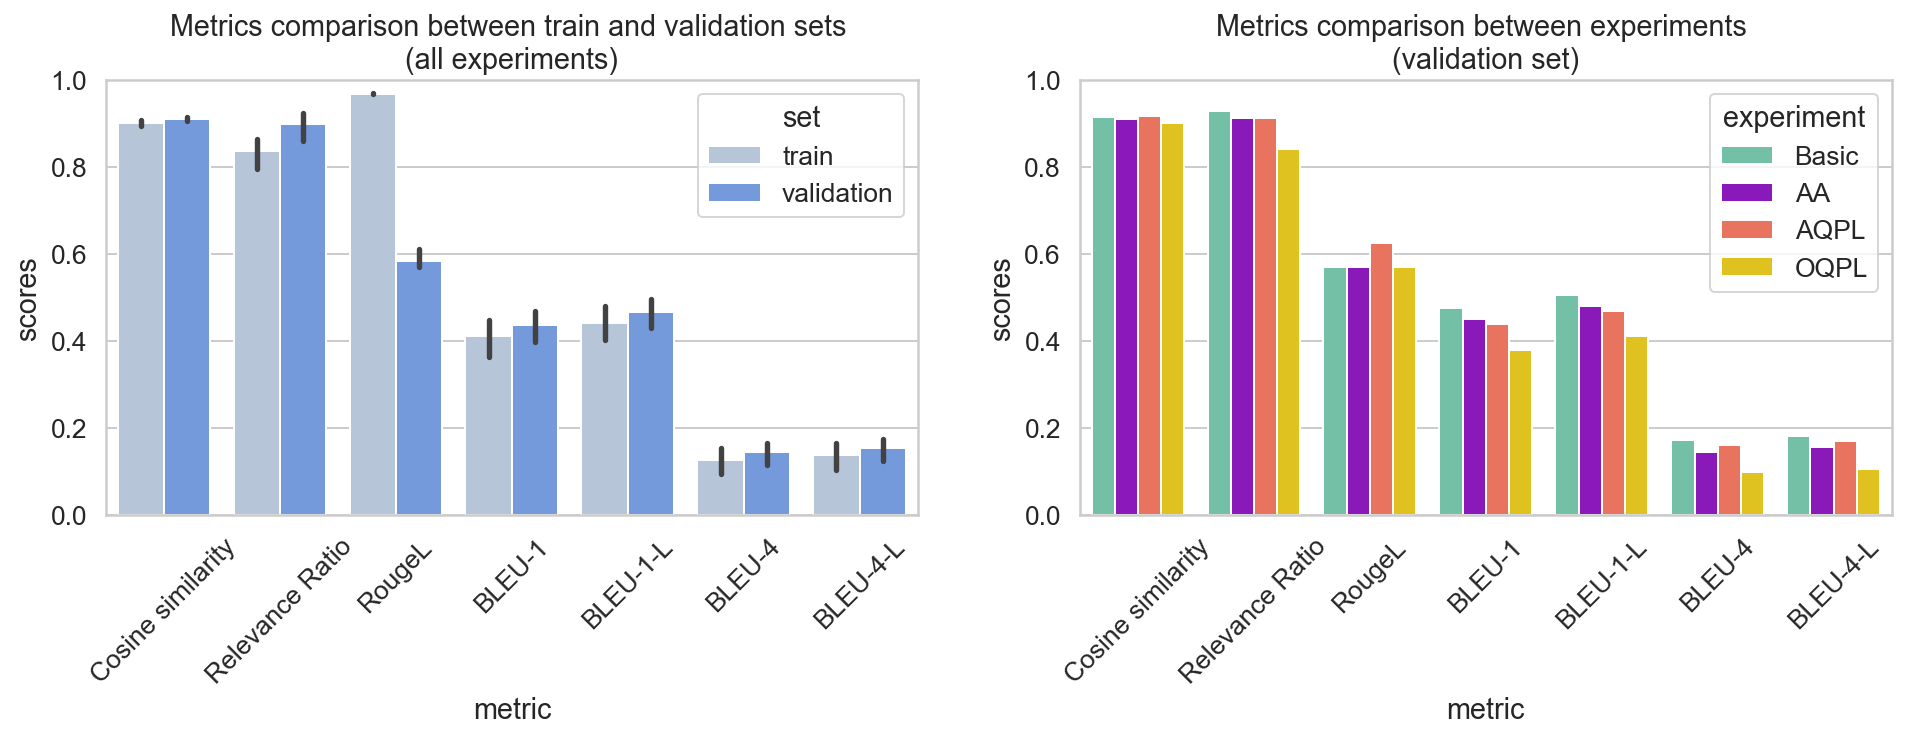

In [41]:
fig, ax =plt.subplots(1,2, figsize=(16,4))
# fig.suptitle("Question Generation Experiments: Metrics")
HAPPY_COLORS_PALETTE = ["lightsteelblue", "cornflowerblue"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
sns.barplot(x="metric", y="scores", hue="set", 
            data=pd_metrics, ax=ax[0]).set_title("Metrics comparison between train and validation sets \n(all experiments)")

HAPPY_COLORS_PALETTE = ["mediumaquamarine", "darkviolet", "tomato", "gold"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

sns.barplot(x="metric", y="scores", hue="experiment", 
            data=pd_metrics[pd_metrics["set"]=="validation"], 
            ax=ax[1]).set_title("Metrics comparison between experiments \n(validation set)")
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 45)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 45)
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])

fig.show()

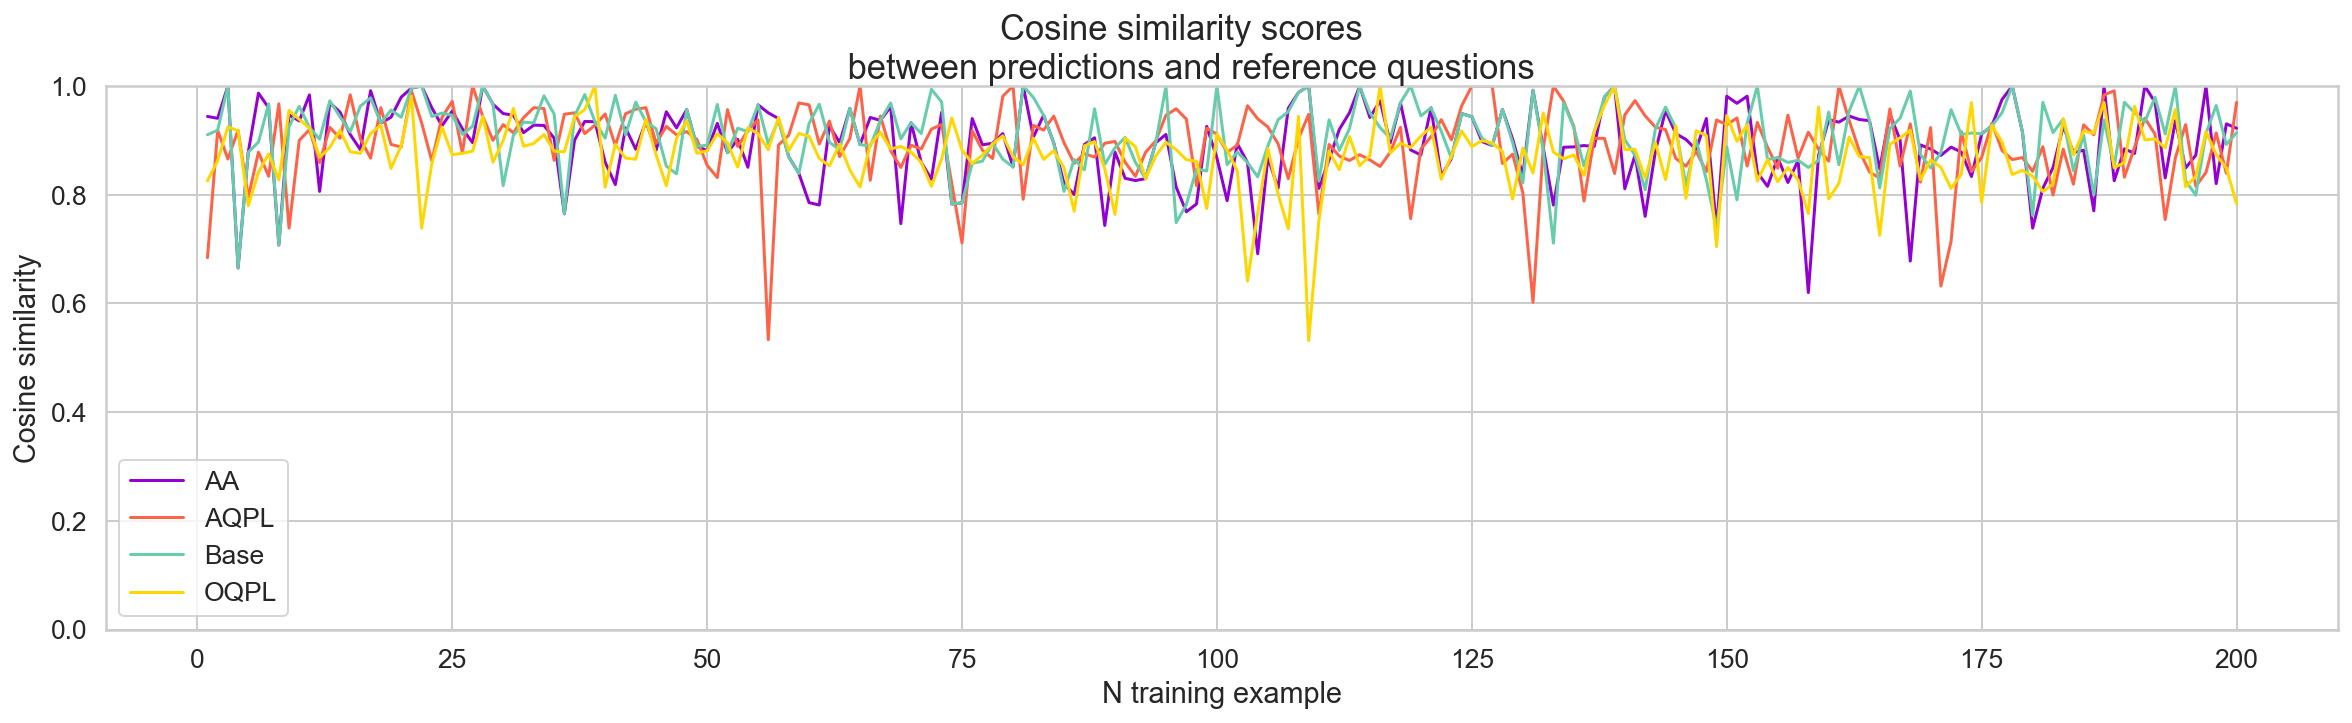

In [11]:
i = 200
rcParams['figure.figsize'] = 20, 5
epoch = [i for i in range(1, len(m_AA_train["examples_similarity"][:i])+1)]
plt.plot(epoch, m_AA_train["examples_similarity"][:i], label="AA", color="darkviolet")
plt.plot(epoch, m_AQPL_train["examples_similarity"][:i], label="AQPL", color="tomato")
plt.plot(epoch, m_basic_train["examples_similarity"][:i], label="Base", color="mediumaquamarine")
plt.plot(epoch, m_OQLP_train["examples_similarity"][:i], label="OQPL", color="gold")
plt.suptitle("Cosine similarity scores \n between predictions and reference questions")
plt.xlabel('N training example')
plt.ylabel('Cosine similarity')
plt.ylim([0, 1])
plt.legend()

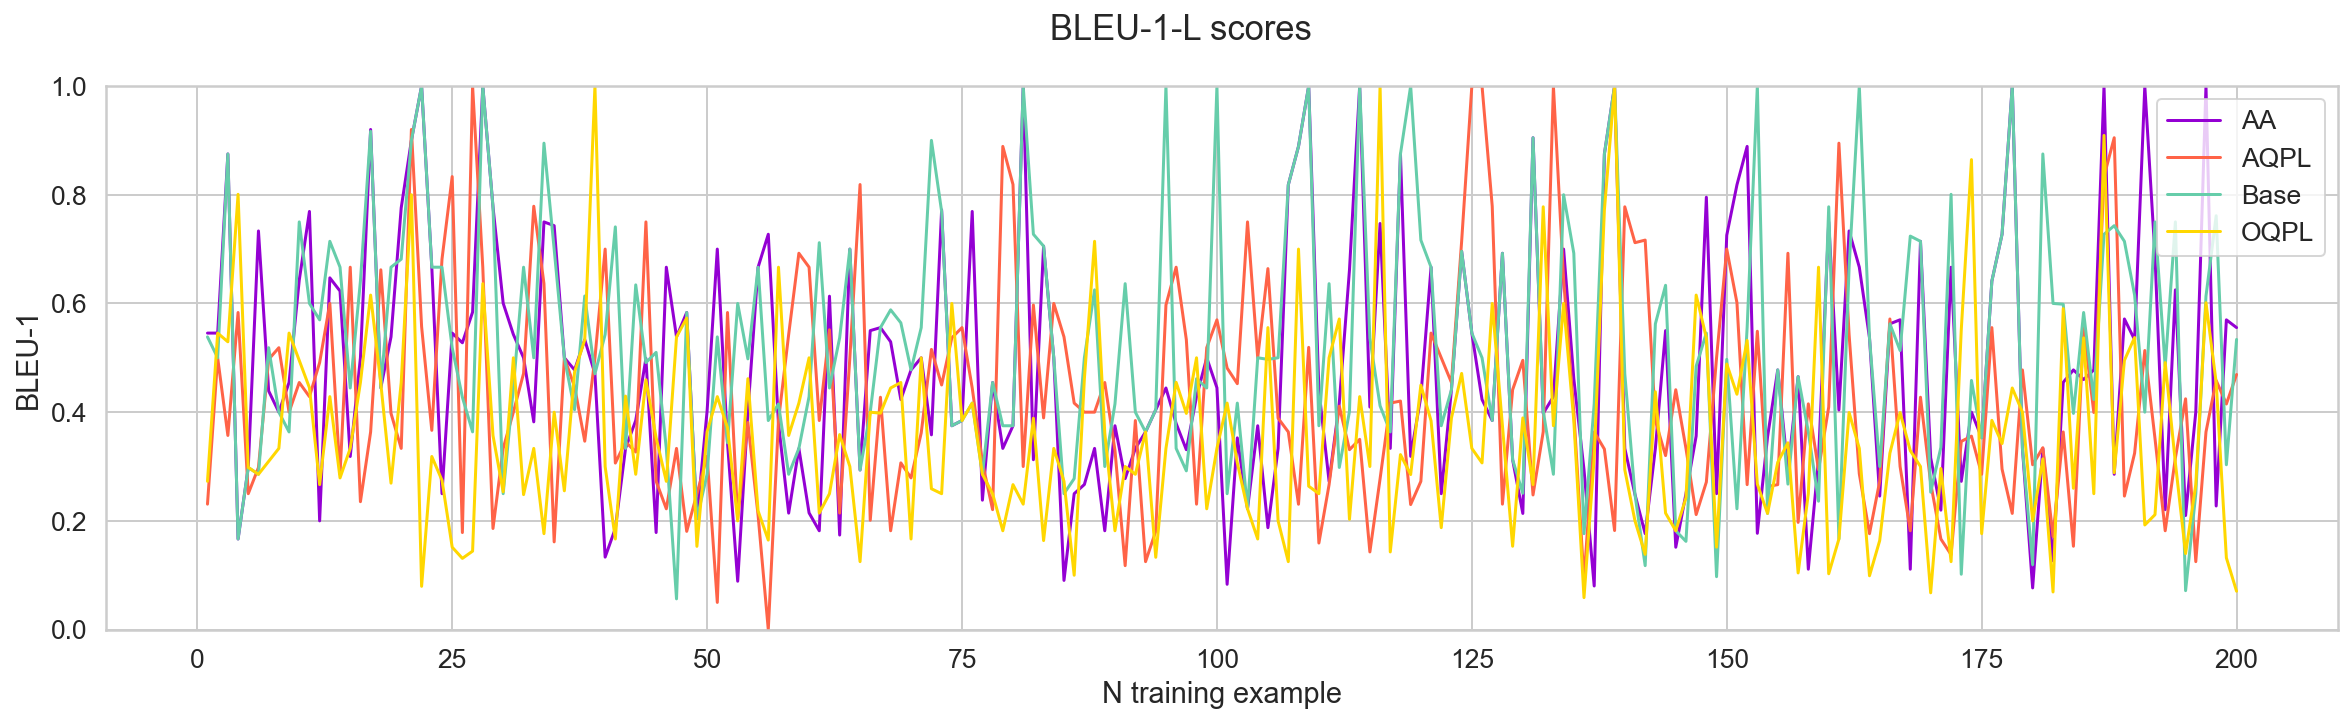

In [12]:
i = 200
rcParams['figure.figsize'] = 20, 5
epoch = [i for i in range(1, len(m_AA_train["bleu_1_lemmas"][:i])+1)]
plt.plot(epoch, m_AA_train["bleu_1_lemmas"][:i], label="AA", color="darkviolet")
plt.plot(epoch, m_AQPL_train["bleu_1_lemmas"][:i], label="AQPL", color="tomato")
plt.plot(epoch, m_basic_train["bleu_1_lemmas"][:i], label="Base", color="mediumaquamarine")
plt.plot(epoch, m_OQLP_train["bleu_1_lemmas"][:i], label="OQPL", color="gold")
plt.suptitle("BLEU-1-L scores \n")
plt.xlabel('N training example')
plt.ylabel('BLEU-1')
plt.ylim([0, 1])
plt.legend()

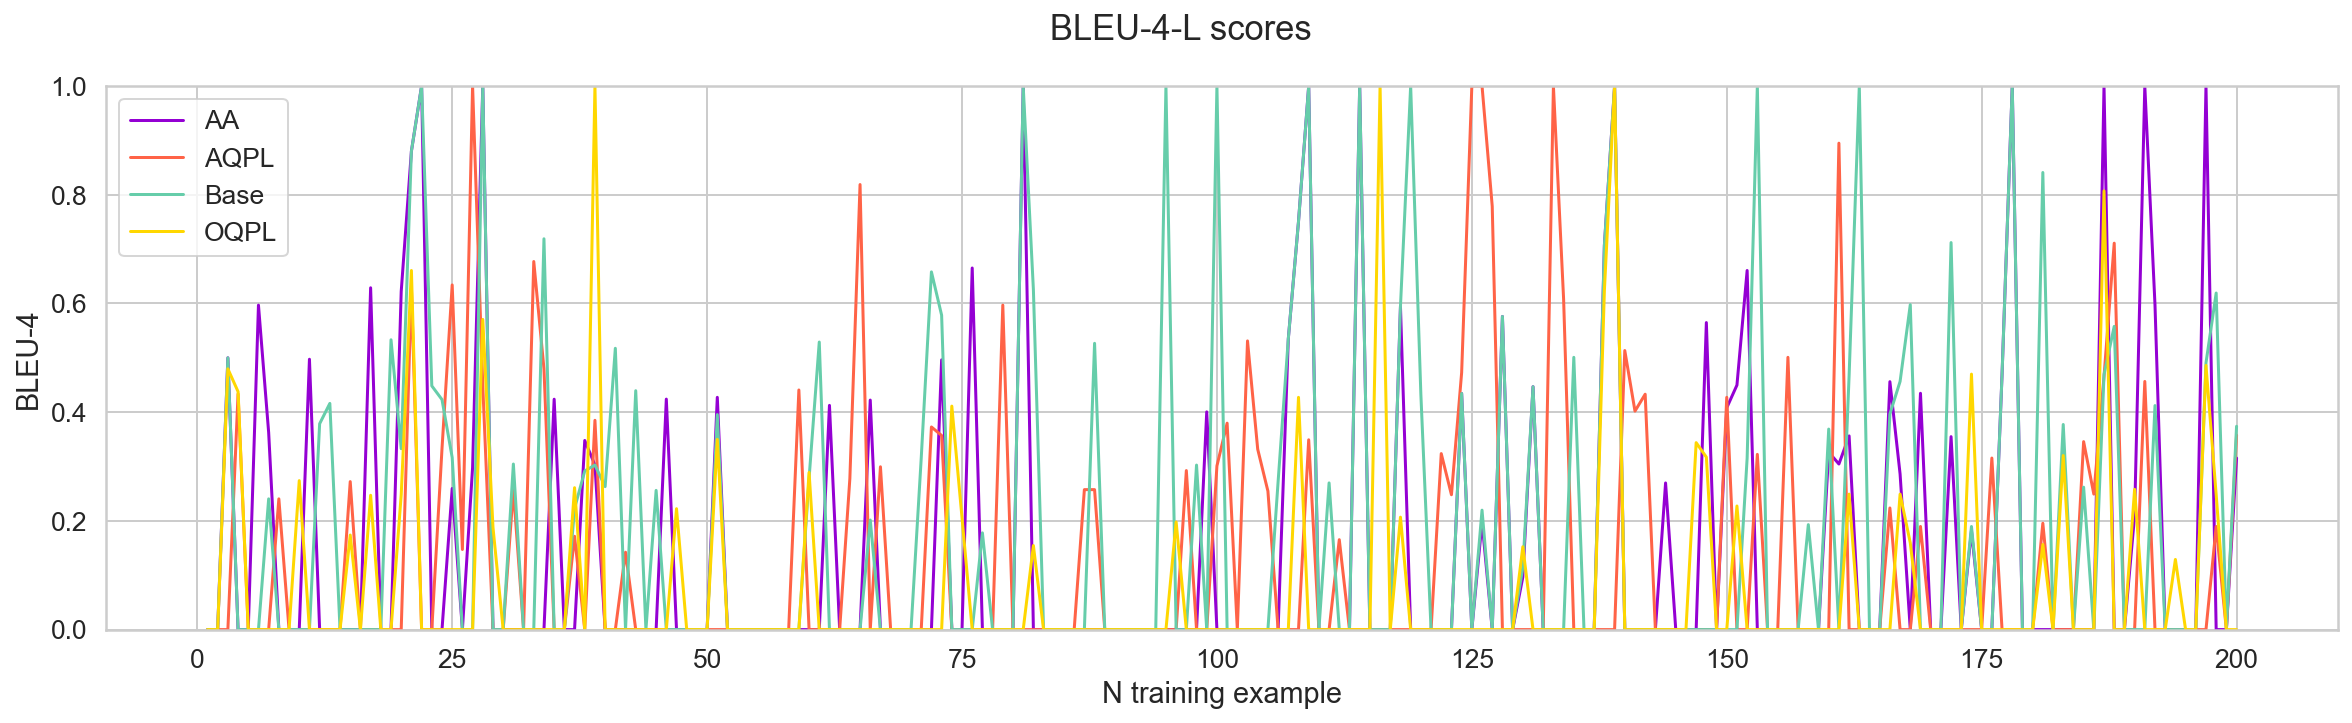

In [13]:
i = 200
rcParams['figure.figsize'] = 20, 5
epoch = [i for i in range(1, len(m_AA_train["bleu_4_lemmas"][:i])+1)]
plt.plot(epoch, m_AA_train["bleu_4_lemmas"][:i], label="AA", color="darkviolet")
plt.plot(epoch, m_AQPL_train["bleu_4_lemmas"][:i], label="AQPL", color="tomato")
plt.plot(epoch, m_basic_train["bleu_4_lemmas"][:i], label="Base", color="mediumaquamarine")
plt.plot(epoch, m_OQLP_train["bleu_4_lemmas"][:i], label="OQPL", color="gold")
plt.suptitle("BLEU-4-L scores \n")
plt.xlabel('N training example')
plt.ylabel('BLEU-4')
plt.ylim([0, 1])
plt.legend()